In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiac-surgery-and-percutaneous/cardiac-surgery-and-percutaneous-coronary-interventions-by-hospital-beginning-2008-1.csv


In [2]:
cs=pd.read_csv("/kaggle/input/cardiac-surgery-and-percutaneous/cardiac-surgery-and-percutaneous-coronary-interventions-by-hospital-beginning-2008-1.csv")
cs

,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate
2,746,Bassett Medical Center,Capital District,Capital District,All PCI,2015,538,5,0.93,1.11,0.95,0.31,2.22,Rate not different than Statewide Rate
3,1438,Bellevue Hospital Ctr,Manhattan,NY Metro - NYC,All PCI,2015,415,7,1.69,1.88,1.02,0.41,2.10,Rate not different than Statewide Rate
4,1178,Bronx-Lebanon-Concourse,Bronx,NY Metro - NYC,All PCI,2015,137,5,3.65,2.52,1.65,0.53,3.84,Rate not different than Statewide Rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,245,Univ. Hosp-Stony Brook,NY Metro - Long Island,NY Metro - Long Island,Valve or Valve/CABG,2008-2010,557,38,6.82,6.06,5.17,3.66,7.09,Rate not different than Statewide Rate
1605,635,Univ. Hosp-Upstate,Central NY,Central NY,Valve or Valve/CABG,2008-2010,227,9,3.96,3.66,4.97,2.27,9.44,Rate not different than Statewide Rate
1606,181,Vassar Bros. Med Ctr,NY Metro - New Rochelle,NY Metro - New Rochelle,Valve or Valve/CABG,2008-2010,513,8,1.56,4.36,1.64,0.71,3.24,Rate significantly lower than Statewide Rate
1607,1139,Westchester Med Ctr,NY Metro - New Rochelle,NY Metro - New Rochelle,Valve or Valve/CABG,2008-2010,503,15,2.98,5.19,2.64,1.48,4.35,Rate significantly lower than Statewide Rate


# Explore the dataset:

In [3]:
# View the first few rows of the dataset
cs.head(2)

,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate


In [4]:
# Check the dimensions of the dataset
print(cs.shape)

(1609, 14)


In [5]:
# Check the data types of each column
print(cs.dtypes)

Facility ID                             int64
Hospital Name                          object
Detailed Region                        object
Region                                 object
Procedure                              object
Year of Hospital Discharge             object
Number of Cases                         int64
Number of Deaths                        int64
Observed Mortality Rate               float64
Expected Mortality Rate               float64
Risk-Adjusted Mortality Rate          float64
Lower Limit of Confidence Interval    float64
Upper Limit of Confidence Interval    float64
Comparison Results                     object
dtype: object


In [6]:
# Check for missing values
print(cs.isnull().sum())

Facility ID                            0
Hospital Name                          0
Detailed Region                        0
Region                                 0
Procedure                              0
Year of Hospital Discharge             0
Number of Cases                        0
Number of Deaths                       0
Observed Mortality Rate                0
Expected Mortality Rate                0
Risk-Adjusted Mortality Rate           0
Lower Limit of Confidence Interval    31
Upper Limit of Confidence Interval    31
Comparison Results                     0
dtype: int64


# Handle missing values:
If there are missing values in the dataset, 
 you can choose to handle them in various ways, such as:
1. Dropping rows with missing values:

In [7]:
cs = cs.dropna()
cs

,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate
2,746,Bassett Medical Center,Capital District,Capital District,All PCI,2015,538,5,0.93,1.11,0.95,0.31,2.22,Rate not different than Statewide Rate
3,1438,Bellevue Hospital Ctr,Manhattan,NY Metro - NYC,All PCI,2015,415,7,1.69,1.88,1.02,0.41,2.10,Rate not different than Statewide Rate
4,1178,Bronx-Lebanon-Concourse,Bronx,NY Metro - NYC,All PCI,2015,137,5,3.65,2.52,1.65,0.53,3.84,Rate not different than Statewide Rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,245,Univ. Hosp-Stony Brook,NY Metro - Long Island,NY Metro - Long Island,Valve or Valve/CABG,2008-2010,557,38,6.82,6.06,5.17,3.66,7.09,Rate not different than Statewide Rate
1605,635,Univ. Hosp-Upstate,Central NY,Central NY,Valve or Valve/CABG,2008-2010,227,9,3.96,3.66,4.97,2.27,9.44,Rate not different than Statewide Rate
1606,181,Vassar Bros. Med Ctr,NY Metro - New Rochelle,NY Metro - New Rochelle,Valve or Valve/CABG,2008-2010,513,8,1.56,4.36,1.64,0.71,3.24,Rate significantly lower than Statewide Rate
1607,1139,Westchester Med Ctr,NY Metro - New Rochelle,NY Metro - New Rochelle,Valve or Valve/CABG,2008-2010,503,15,2.98,5.19,2.64,1.48,4.35,Rate significantly lower than Statewide Rate


1. Filling missing values with a specific value (e.g., 0 or mean/median of the column):

In [8]:
# Fill missing values with 0
cs = cs.fillna(0)
cs.head(2)

,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate


In [9]:
# Fill missing values with the mean of the column
cs = cs.fillna(cs.mean())
cs.head(2)

/tmp/ipykernel_20/2207112647.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cs = cs.fillna(cs.mean())


,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate


1. Forward filling or backward filling missing values:

In [10]:
# Forward fill missing values
cs = cs.ffill()


In [11]:
# Backward fill missing values
cs = cs.bfill()

1. Handle duplicate values:


In [12]:
cs = cs.drop_duplicates()
cs.head(2)

,Facility ID,Hospital Name,Detailed Region,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,116,Arnot Ogden Med Ctr,Western NY - Rochester,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate


# Summary statistics:

In [13]:
# Generate descriptive statistics
cs.describe()


,Facility ID,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,907.517110,553.890368,9.429658,2.036502,1.927560,2.067921,0.904157,5.592231
std,598.313051,600.780043,10.883737,1.736273,1.284451,1.837981,1.025027,8.876452
min,1.000000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.580000
25%,471.000000,199.000000,2.250000,0.752500,0.880000,0.790000,0.160000,2.255000
50%,885.000000,364.500000,6.000000,1.545000,1.480000,1.485000,0.500000,3.955000
75%,1438.000000,628.000000,12.000000,3.010000,2.810000,2.990000,1.380000,6.035000
max,3058.000000,4777.000000,108.000000,16.670000,7.450000,14.590000,6.660000,140.570000


In [14]:
# Calculate the correlation matrix
correlation_matrix = cs.corr()
correlation_matrix

/tmp/ipykernel_20/3874134096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cs.corr()


,Facility ID,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval
Facility ID,1.000000,0.034961,-0.043070,0.012505,0.055384,-0.051101,-0.053911,-0.032432
Number of Cases,0.034961,1.000000,0.511709,-0.177499,-0.161639,-0.174510,0.023884,-0.254929
Number of Deaths,-0.043070,0.511709,1.000000,0.442889,0.474525,0.383175,0.658028,-0.079016
Observed Mortality Rate,0.012505,-0.177499,0.442889,1.000000,0.733325,0.918518,0.872018,0.190047
Expected Mortality Rate,0.055384,-0.161639,0.474525,0.733325,1.000000,0.600847,0.669540,0.126886
Risk-Adjusted Mortality Rate,-0.051101,-0.174510,0.383175,0.918518,0.600847,1.000000,0.879233,0.262681
Lower Limit of Confidence Interval,-0.053911,0.023884,0.658028,0.872018,0.669540,0.879233,1.000000,0.132338
Upper Limit of Confidence Interval,-0.032432,-0.254929,-0.079016,0.190047,0.126886,0.262681,0.132338,1.000000


# Data visualization:

In [15]:
cs.columns

Index(['Facility ID', 'Hospital Name', 'Detailed Region', 'Region',
       'Procedure', 'Year of Hospital Discharge', 'Number of Cases',
       'Number of Deaths', 'Observed Mortality Rate',
       'Expected Mortality Rate', 'Risk-Adjusted Mortality Rate',
       'Lower Limit of Confidence Interval',
       'Upper Limit of Confidence Interval', 'Comparison Results'],
      dtype='object')

1. Bar plot: Visualize the number of cases for each procedure.

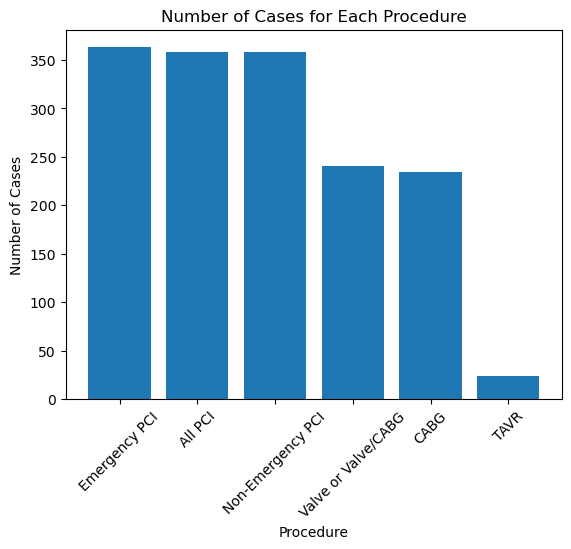

In [16]:
procedure_counts = cs['Procedure'].value_counts()
plt.bar(procedure_counts.index, procedure_counts.values)
plt.xlabel('Procedure')
plt.ylabel('Number of Cases')
plt.title('Number of Cases for Each Procedure')
plt.xticks(rotation=45)
plt.show()

2. Box plot: Compare the distribution of observed mortality rates across different regions.

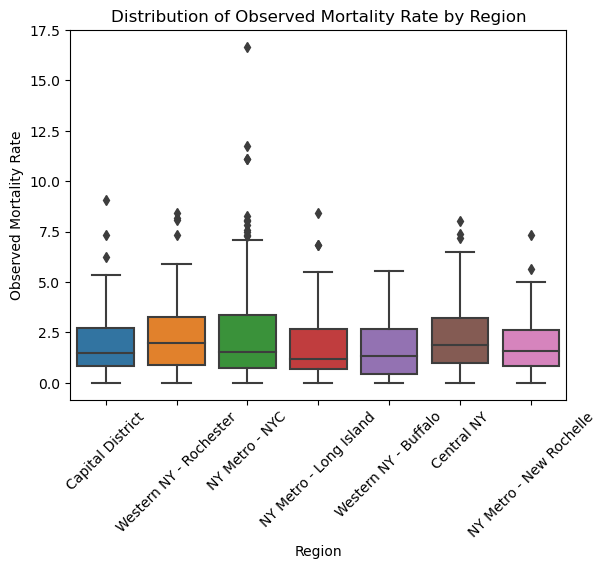

In [17]:
sns.boxplot(x='Region', y='Observed Mortality Rate', data=cs)
plt.xlabel('Region')
plt.ylabel('Observed Mortality Rate')
plt.title('Distribution of Observed Mortality Rate by Region')
plt.xticks(rotation=45)
plt.show()

3. Scatter plot: Explore the relationship between expected mortality rate and risk-adjusted mortality rate.

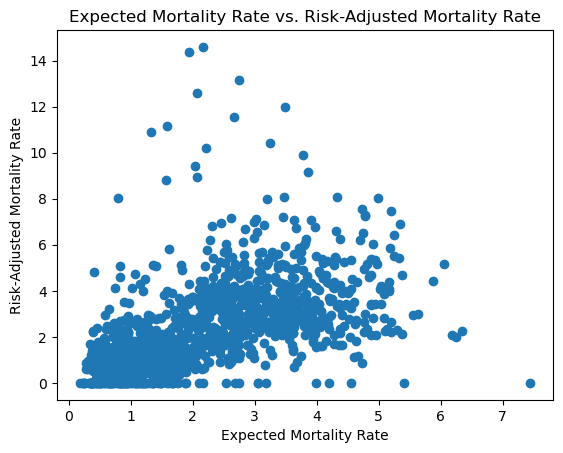

In [18]:
plt.scatter(cs['Expected Mortality Rate'], cs['Risk-Adjusted Mortality Rate'])
plt.xlabel('Expected Mortality Rate')
plt.ylabel('Risk-Adjusted Mortality Rate')
plt.title('Expected Mortality Rate vs. Risk-Adjusted Mortality Rate')
plt.show()

4. Histogram: Visualize the distribution of number of deaths.

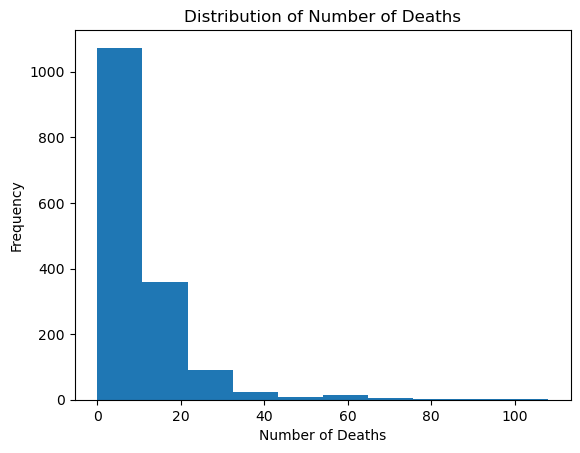

In [19]:
plt.hist(cs['Number of Deaths'], bins=10)
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Deaths')
plt.show()

5. Heatmap: Examine the correlation between variables using a heatmap.

/tmp/ipykernel_20/3276972728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cs.corr()


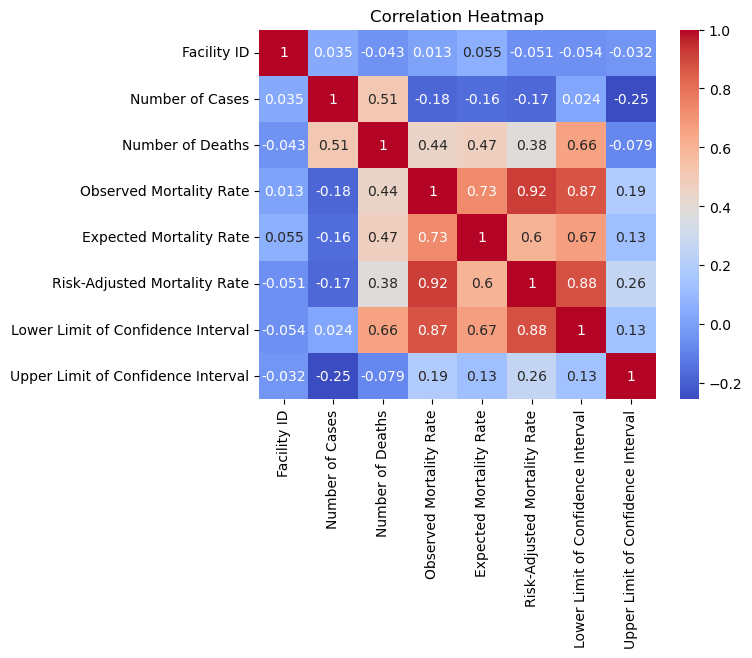

In [20]:
correlation_matrix = cs.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

6. Stacked bar plot: Visualize the distribution of procedures by region.

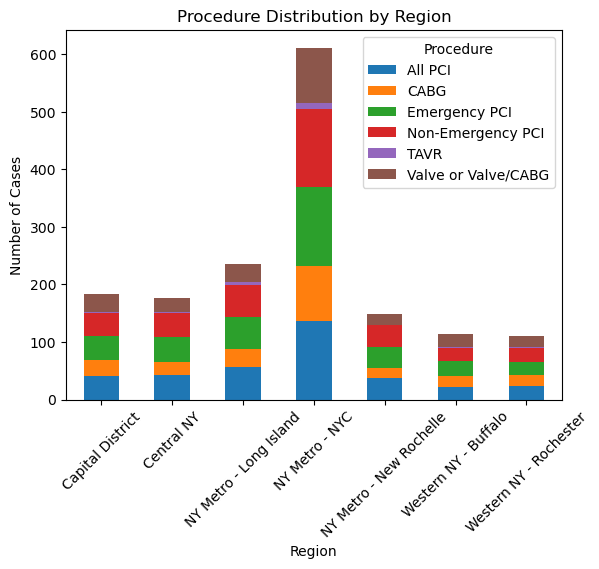

In [21]:
procedure_region = cs.groupby(['Region', 'Procedure']).size().unstack()
procedure_region.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.title('Procedure Distribution by Region')
plt.xticks(rotation=45)
plt.legend(title='Procedure')
plt.show()

7. Violin plot: Compare the distribution of observed mortality rates for each procedure.

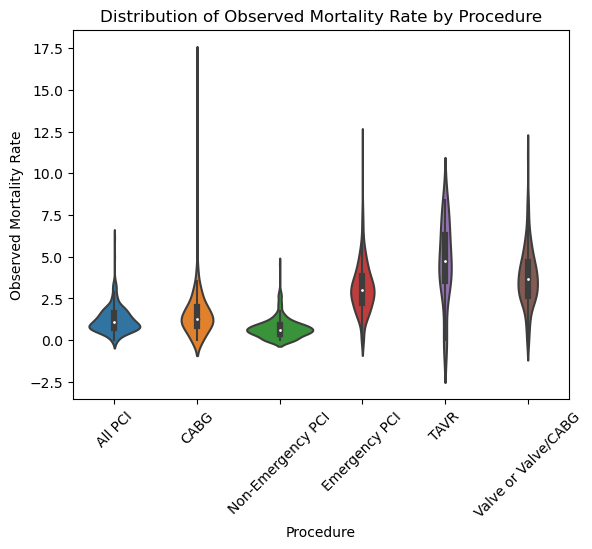

In [22]:
sns.violinplot(x='Procedure', y='Observed Mortality Rate', data=cs)
plt.xlabel('Procedure')
plt.ylabel('Observed Mortality Rate')
plt.title('Distribution of Observed Mortality Rate by Procedure')
plt.xticks(rotation=45)
plt.show()


8. Scatter plot matrix: Explore the relationships between multiple numeric variables.

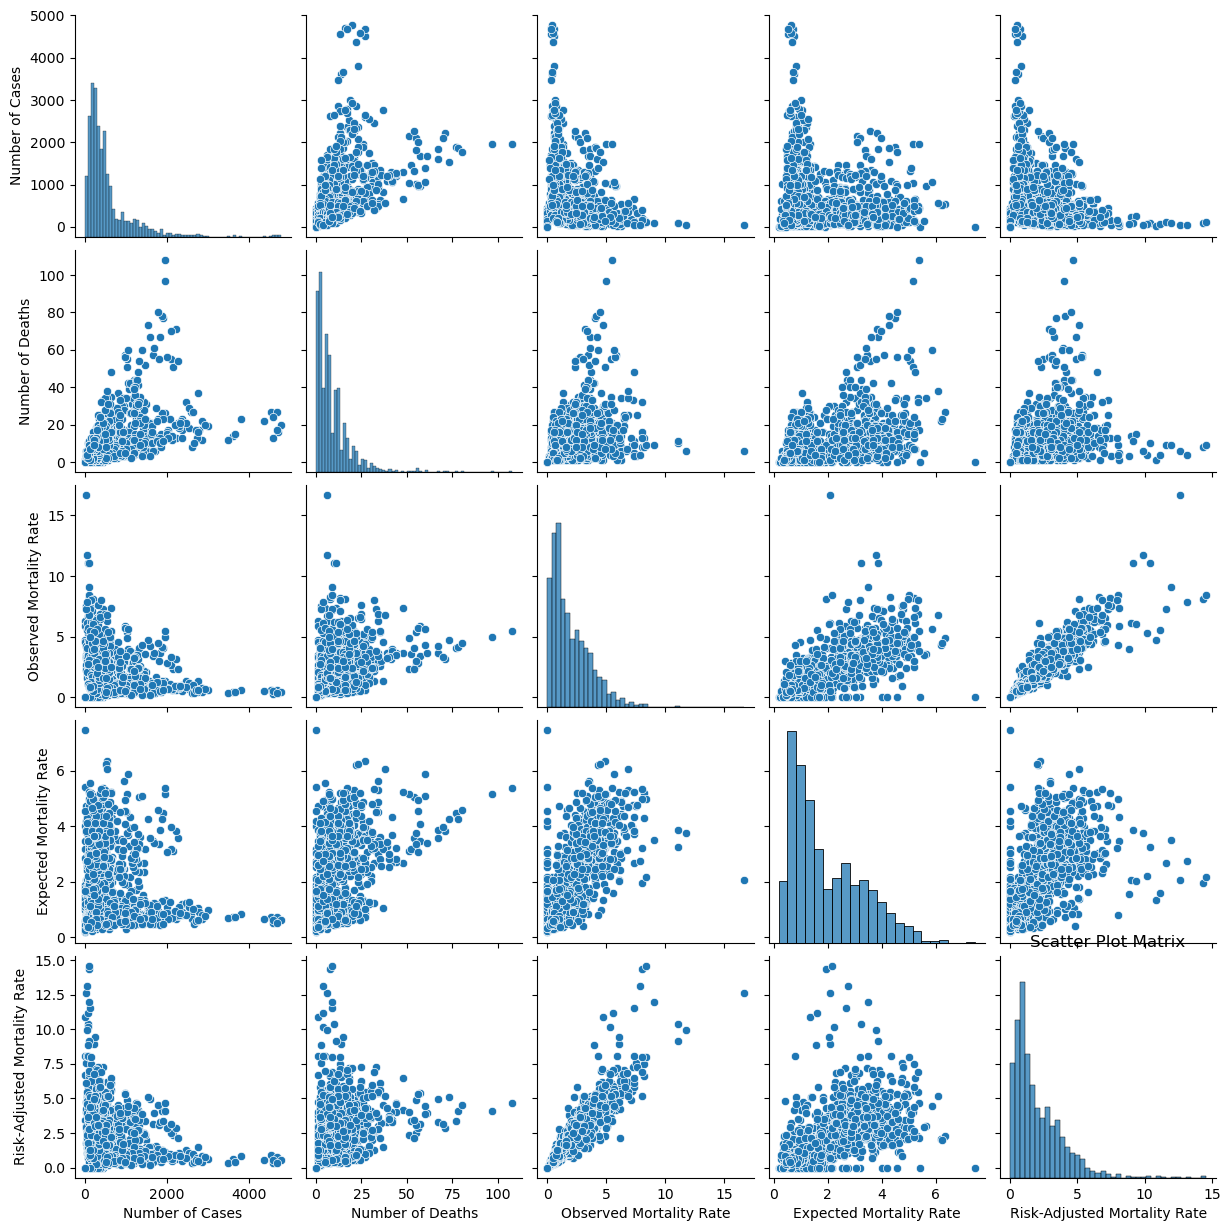

In [23]:
numeric_cols = ['Number of Cases', 'Number of Deaths', 'Observed Mortality Rate',
                'Expected Mortality Rate', 'Risk-Adjusted Mortality Rate']
sns.pairplot(cs[numeric_cols])
plt.title('Scatter Plot Matrix')
plt.show()


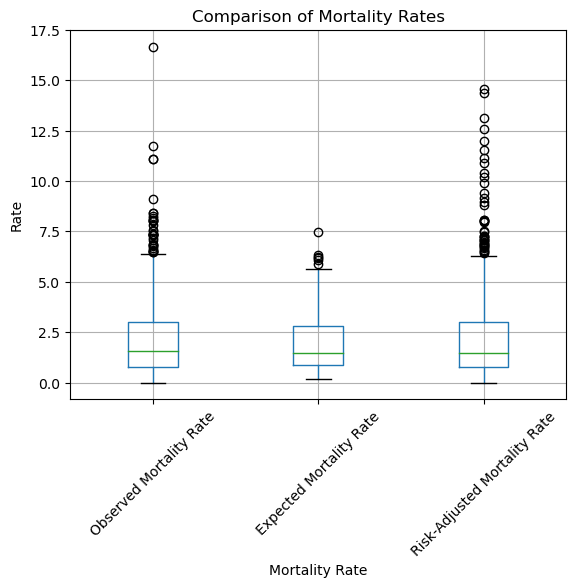

In [24]:
mortality_cols = ['Observed Mortality Rate', 'Expected Mortality Rate', 'Risk-Adjusted Mortality Rate']
mortality_rates = cs[mortality_cols]
mortality_rates.boxplot()
plt.xlabel('Mortality Rate')
plt.ylabel('Rate')
plt.title('Comparison of Mortality Rates')
plt.xticks(rotation=45)
plt.show()


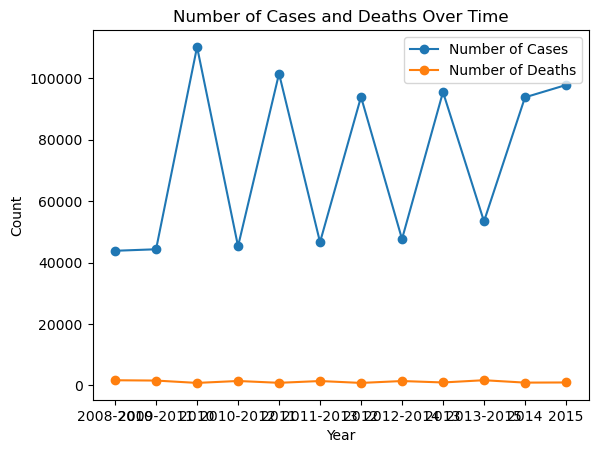

In [25]:
yearly_data = cs.groupby('Year of Hospital Discharge').agg({'Number of Cases': 'sum', 'Number of Deaths': 'sum'}).reset_index()
plt.plot(yearly_data['Year of Hospital Discharge'], yearly_data['Number of Cases'], marker='o', label='Number of Cases')
plt.plot(yearly_data['Year of Hospital Discharge'], yearly_data['Number of Deaths'], marker='o', label='Number of Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Cases and Deaths Over Time')
plt.legend()
plt.show()


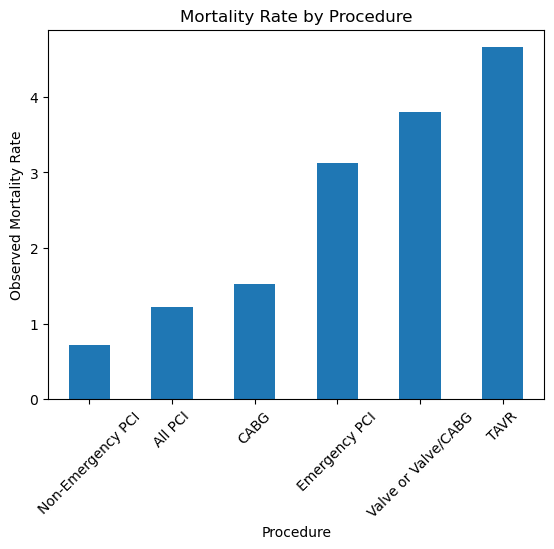

In [26]:
procedure_mortality = cs.groupby('Procedure')['Observed Mortality Rate'].mean().sort_values()
procedure_mortality.plot(kind='bar')
plt.xlabel('Procedure')
plt.ylabel('Observed Mortality Rate')
plt.title('Mortality Rate by Procedure')
plt.xticks(rotation=45)
plt.show()
